## Helpful links
follow this (signal processing portion): https://app.box.com/file/1283099900531

signal filtering (very helpful): https://swharden.com/blog/2020-09-23-signal-filtering-in-python/

Python toolbox: https://github.com/jabeim/AB-Generic-Python-Toolbox/blob/master/Documentation%20__draft__v0.1.docx

Google research code: https://gitlab.ilabt.imec.be/ahadifar/google-research/-/tree/master/cochlear_implant

python librosa library 

frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/

paper on mimicking the human ear https://ecs.utdallas.edu/loizou/cimplants/tutorial/introci.pdf

rms energy https://www.analyticsvidhya.com/blog/2022/05/comparison-of-the-rms-energy-and-the-amplitude-envelope/

construct sinusoid https://stackoverflow.com/questions/48043004/how-do-i-generate-a-sine-wave-using-python

adding noise https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

spectrogram https://www.pnsn.org/spectrograms/what-is-a-spectrogram

plot spectogram https://stackoverflow.com/questions/48598994/scipy-signal-spectrogram-compared-to-matplotlib-pyplot-specgram

frame (2ms) overlap https://stackoverflow.com/questions/66887965/python-audio-segmentation-with-overlapping-and-hamming-windows

In [1]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math

In [2]:
# frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/
FREQUENCIES_FOR_5_CHANNELS_TABLE_1 = [350, 607, 1053,1827,3170, 8700]
FREQUENCIES_FOR_16_CHANNELS_TABLE_1 = [250, 416, 494, 587, 697, 828, 983, 1168, 1387, 1648, 1958, 2326, 2762, 3281, 3898, 4630, 8700]
FREQUENCIES_FOR_6_CHANNELS_TABLE_2 = [188, 563, 1063, 1813, 2938, 4813, 7938]
FREQUENCIES_FOR_22_CHANNELS_TABLE_2 = [188, 313, 438, 563, 688, 813, 938, 1063, 1188, 1438, 1688, 1938, 2313, 2688, 3188, 3688, 4313, 5603, 5938, 6938, 7938]
LEN_TIME_QUANTIZED_MS = 8

In [3]:
wav_file = "LL-Q1860_(eng)-Vealhurl-cosmos2.wav"
frequency_ranges = FREQUENCIES_FOR_6_CHANNELS_TABLE_2 ### CHANGE THIS TO which you want

In [4]:
# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(wav_file)
times = np.arange(len(data))/sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(data.shape)

print("sample_rate:", str(sample_rate) + " samples/sec")

(62848,)
sample_rate: 48000 samples/sec


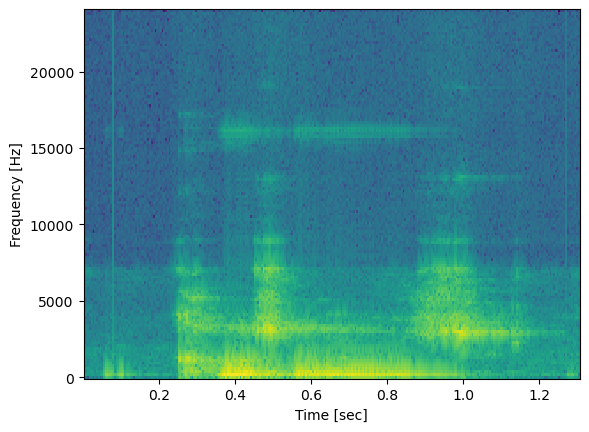

In [5]:
spectrogram_data = scipy.signal.spectrogram(data, sample_rate)

f, t, Sxx = scipy.signal.spectrogram(data, sample_rate)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [6]:
data.shape

(62848,)

In [7]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [8]:
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))

In [9]:
bandpassed_frequencies_low_to_high

[array([-2.57185563, -2.68157693, -2.78924352, ..., -0.13748159,
        -0.11930949, -0.10293655]),
 array([ 0.22521796,  0.00652396, -0.20983347, ...,  0.09657877,
         0.09935637,  0.09956848]),
 array([-0.36379953,  0.39850859,  1.1580301 , ..., -0.36517201,
        -0.46783202, -0.5301125 ]),
 array([ 0.38891196, -0.27022344, -0.8611591 , ..., -0.82757462,
        -1.01343376, -1.05717415]),
 array([ 0.19414493, -0.9550364 , -1.79059025, ..., -2.25405309,
        -1.0016136 ,  0.49897806]),
 array([-0.07336397, -0.83516428, -0.91514664, ..., -0.00159459,
         0.16659081, -0.06987253])]

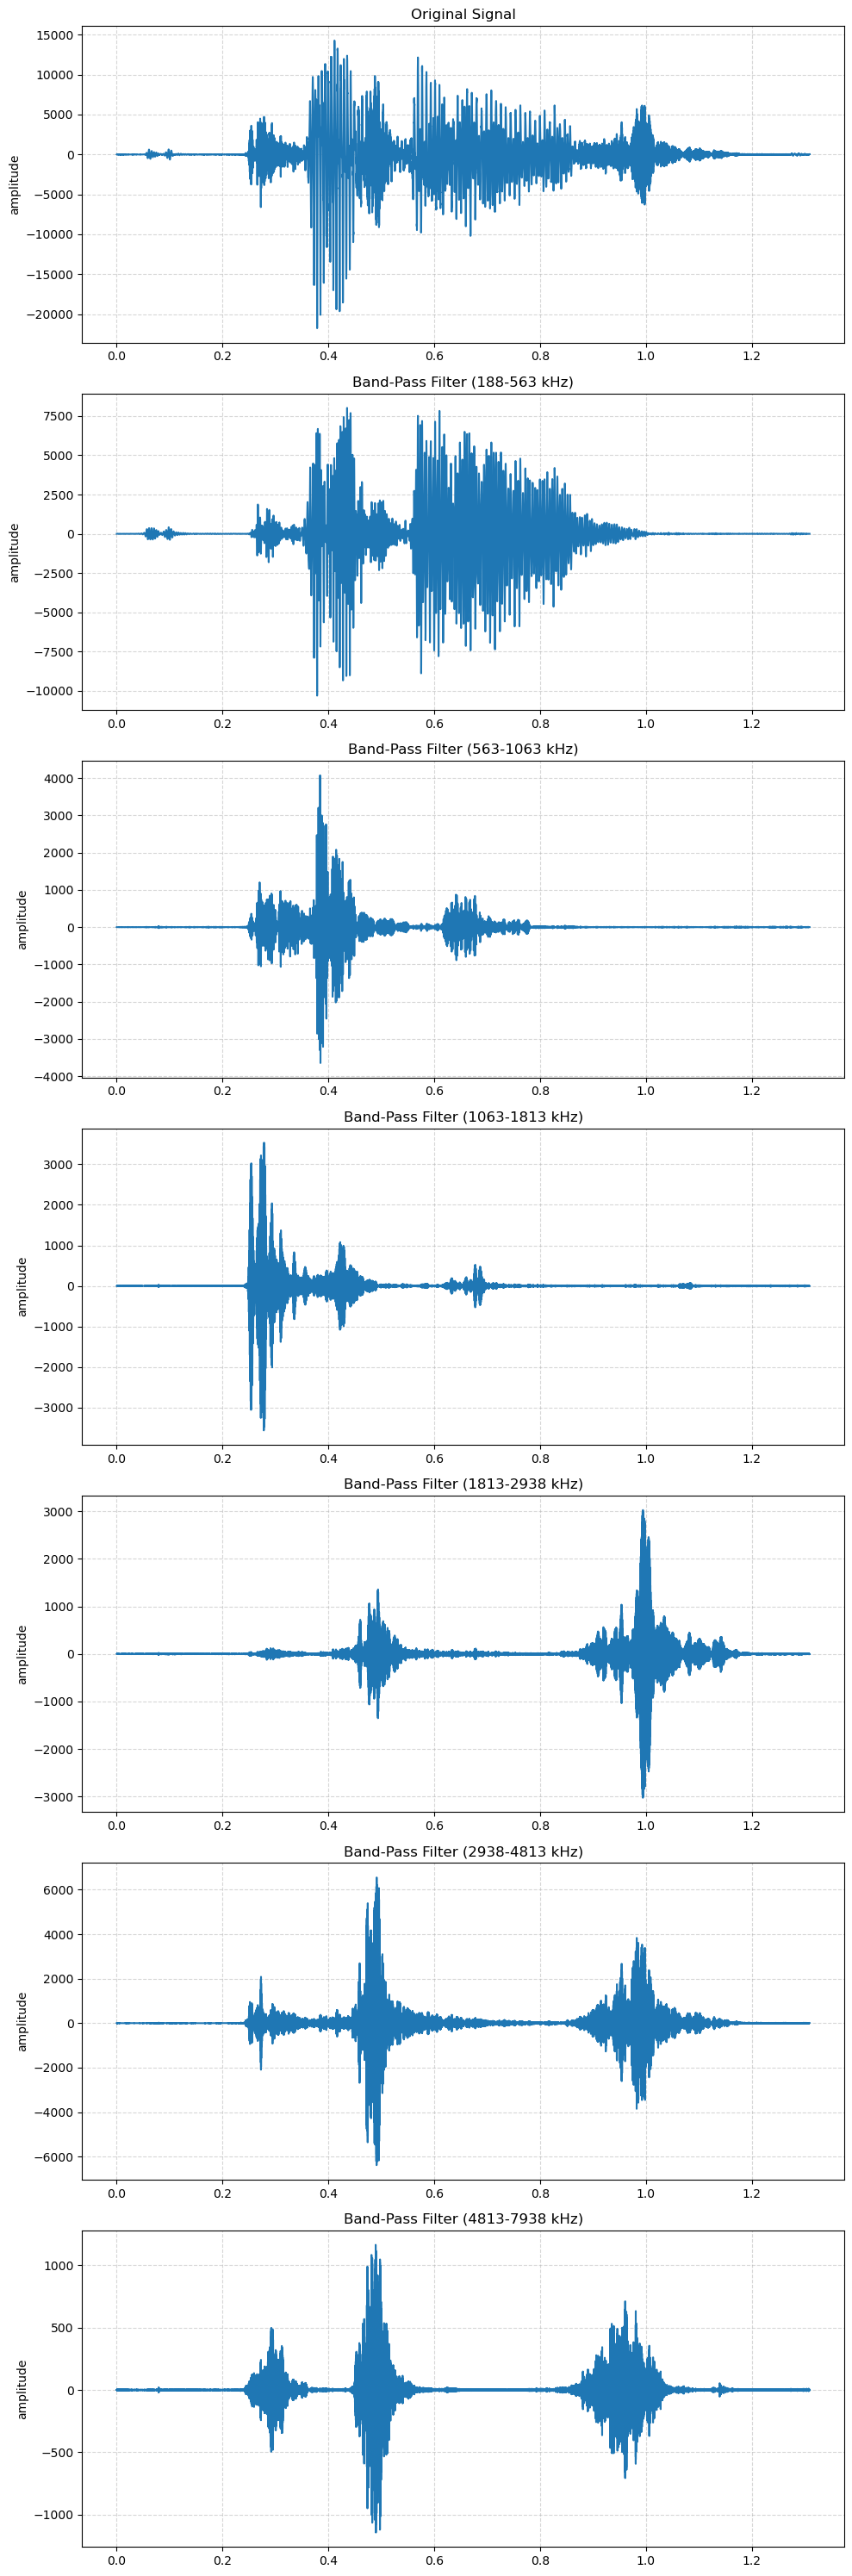

In [10]:
# display result Bandpassed
fig, axes = plt.subplots(len(bandpassed_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data) # plot entire graph
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet

# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Band-Pass Filter ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, bandpassed_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()

plt.show()



In [11]:
# get envelope (absolute amplitude)
# should this be half-wave rectified?

In [12]:
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))

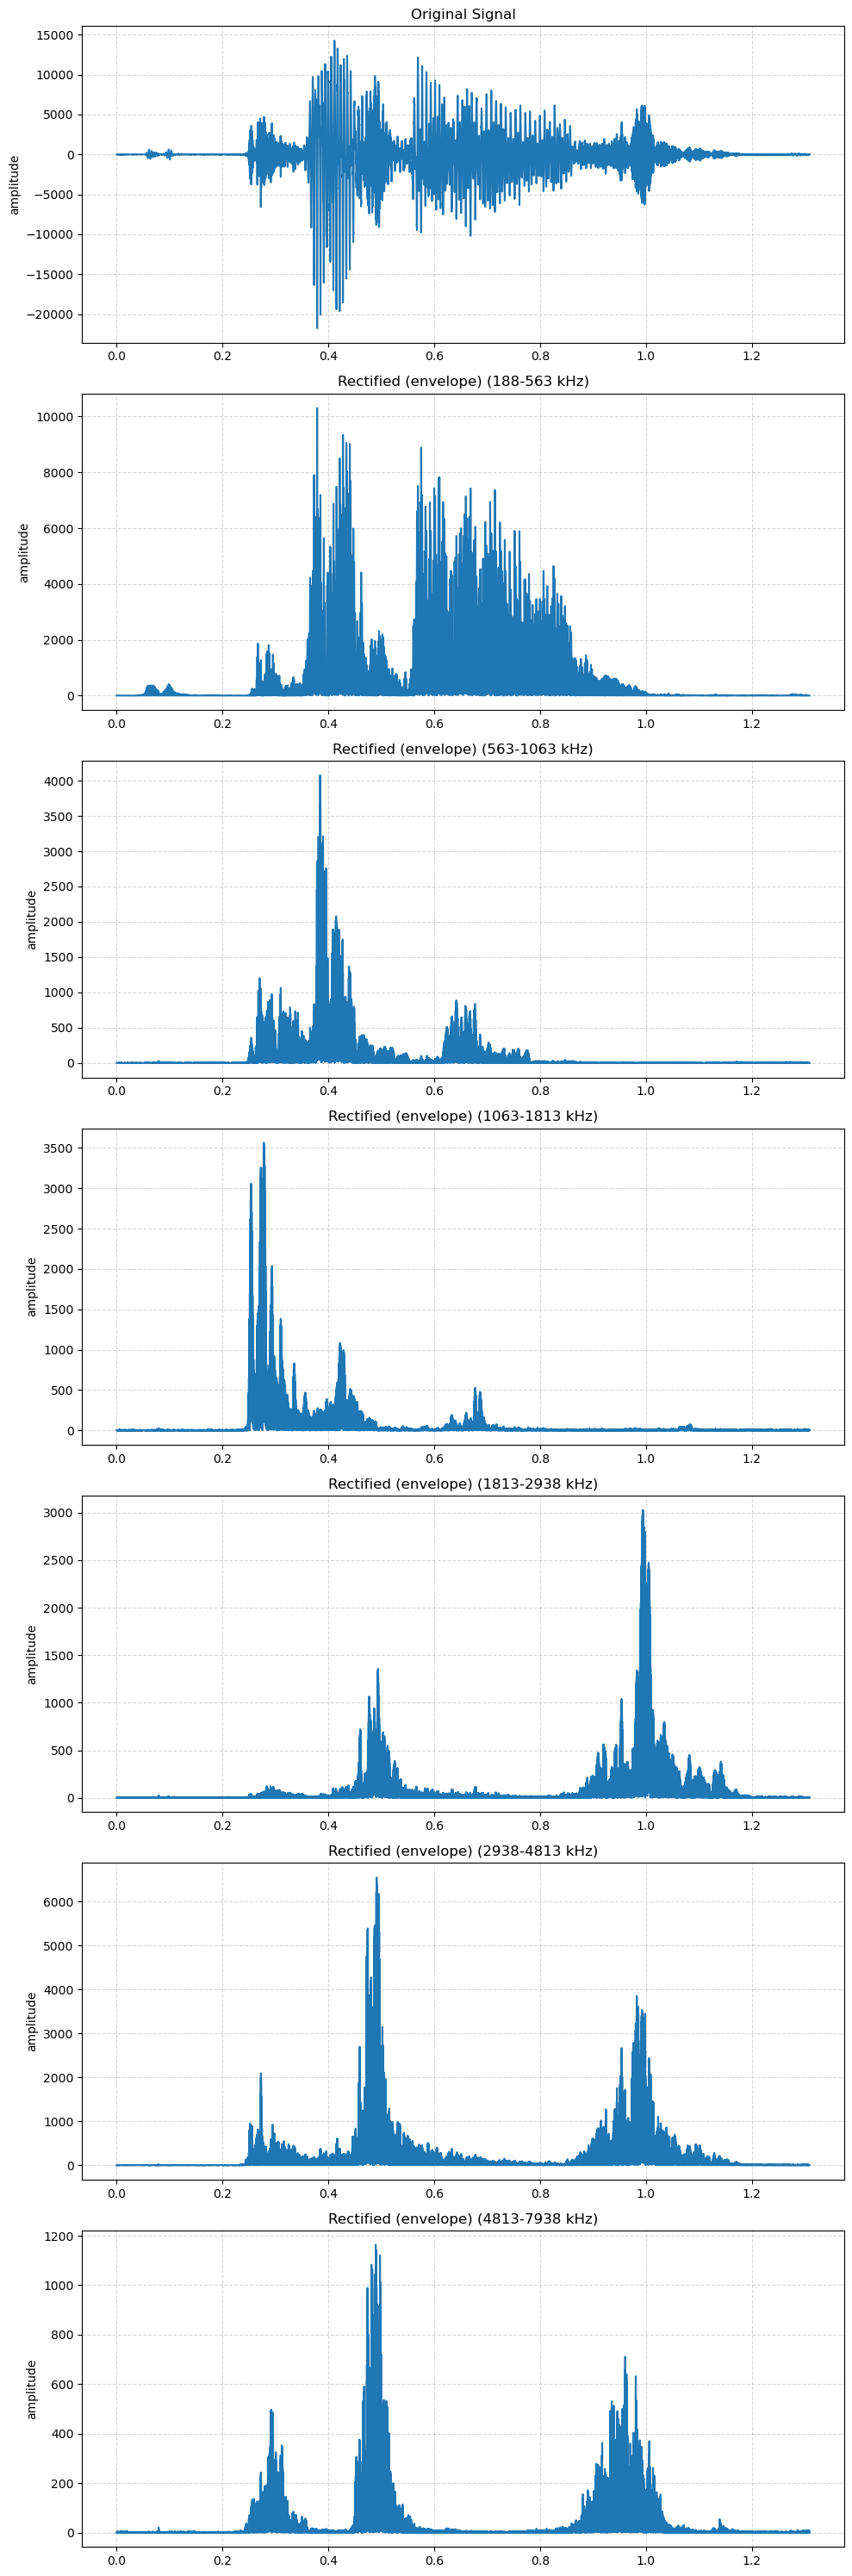

In [13]:
# display result Rectified
fig, axes = plt.subplots(len(enveloped_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Rectified (envelope) ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, enveloped_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [14]:
# get energy
'''
get the time interval 8ms
get computer the rms (root mean square energy) but shift it by 2 seconds for some overlap. this makes the signal sound smother and less choppy.

in cochlear implant, the energy is converted to current
in this case, i'll reconstruct the signal using sinusoid - represent the 8ms of that signal with a sinusoid with that (average) frequency (of the 8ms) and amplitude. do this for each frequency band. then (sum) all the sinusoid values at that point to reconstruct the sound.

construct the spectrograph

TIP: make sure to use a zero phase filter as a parameter in the bandpass filter

try with 10ms and zoom in to get the amplitude of the sinusoid.
'''


"\nget the time interval 8ms\nget computer the rms (root mean square energy) but shift it by 2 seconds for some overlap. this makes the signal sound smother and less choppy.\n\nin cochlear implant, the energy is converted to current\nin this case, i'll reconstruct the signal using sinusoid - represent the 8ms of that signal with a sinusoid with that (average) frequency (of the 8ms) and amplitude. do this for each frequency band. then (sum) all the sinusoid values at that point to reconstruct the sound.\n\nconstruct the spectrograph\n\nTIP: make sure to use a zero phase filter as a parameter in the bandpass filter\n\ntry with 10ms and zoom in to get the amplitude of the sinusoid.\n"

In [15]:
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
print(len(enveloped_frequencies_low_to_high))
print(enveloped_frequencies_low_to_high[0].shape)

6
(62848,)


In [16]:
# sample rate = 48000/s or 384 per 8 ms
# got rms energy for 384 samples (no overlap currently) since that's equal to 8ms

rms_energy_values = []
for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of indices equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += frame_step
        final_indx += frame_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

In [17]:
len(rms_energy_values[0])

164

In [18]:
rms_energy_values
enveloped_frequencies_low_to_high

[array([2.57185563, 2.68157693, 2.78924352, ..., 0.13748159, 0.11930949,
        0.10293655]),
 array([0.22521796, 0.00652396, 0.20983347, ..., 0.09657877, 0.09935637,
        0.09956848]),
 array([0.36379953, 0.39850859, 1.1580301 , ..., 0.36517201, 0.46783202,
        0.5301125 ]),
 array([0.38891196, 0.27022344, 0.8611591 , ..., 0.82757462, 1.01343376,
        1.05717415]),
 array([0.19414493, 0.9550364 , 1.79059025, ..., 2.25405309, 1.0016136 ,
        0.49897806]),
 array([0.07336397, 0.83516428, 0.91514664, ..., 0.00159459, 0.16659081,
        0.06987253])]

In [19]:
'''
the rms energy values will be the amplitude of the sinusoid over 8ms
the frequency of the 8ms should be the average frequency in that range.
'''

def create_sinusoid(average_frequency, amplitude, t=0.008):
    '''
    average_frequency (int): should be the average frequency of that channel
    t (int): should be the time of the generated sound in seconds
    sample_rate (int): should be the sample rate of the audio file
    sample_rate (float): should be the amplitude of the sound, in this case the rms energy value
    ''' 
    f = average_frequency

    samples = np.linspace(0, t, int(sample_rate*t), endpoint=False)

    signal = np.sin(2 * np.pi * f * samples)

    signal *= amplitude # ?? should multiply by the rms energy

    return signal

In [26]:
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, LEN_TIME_QUANTIZED_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    

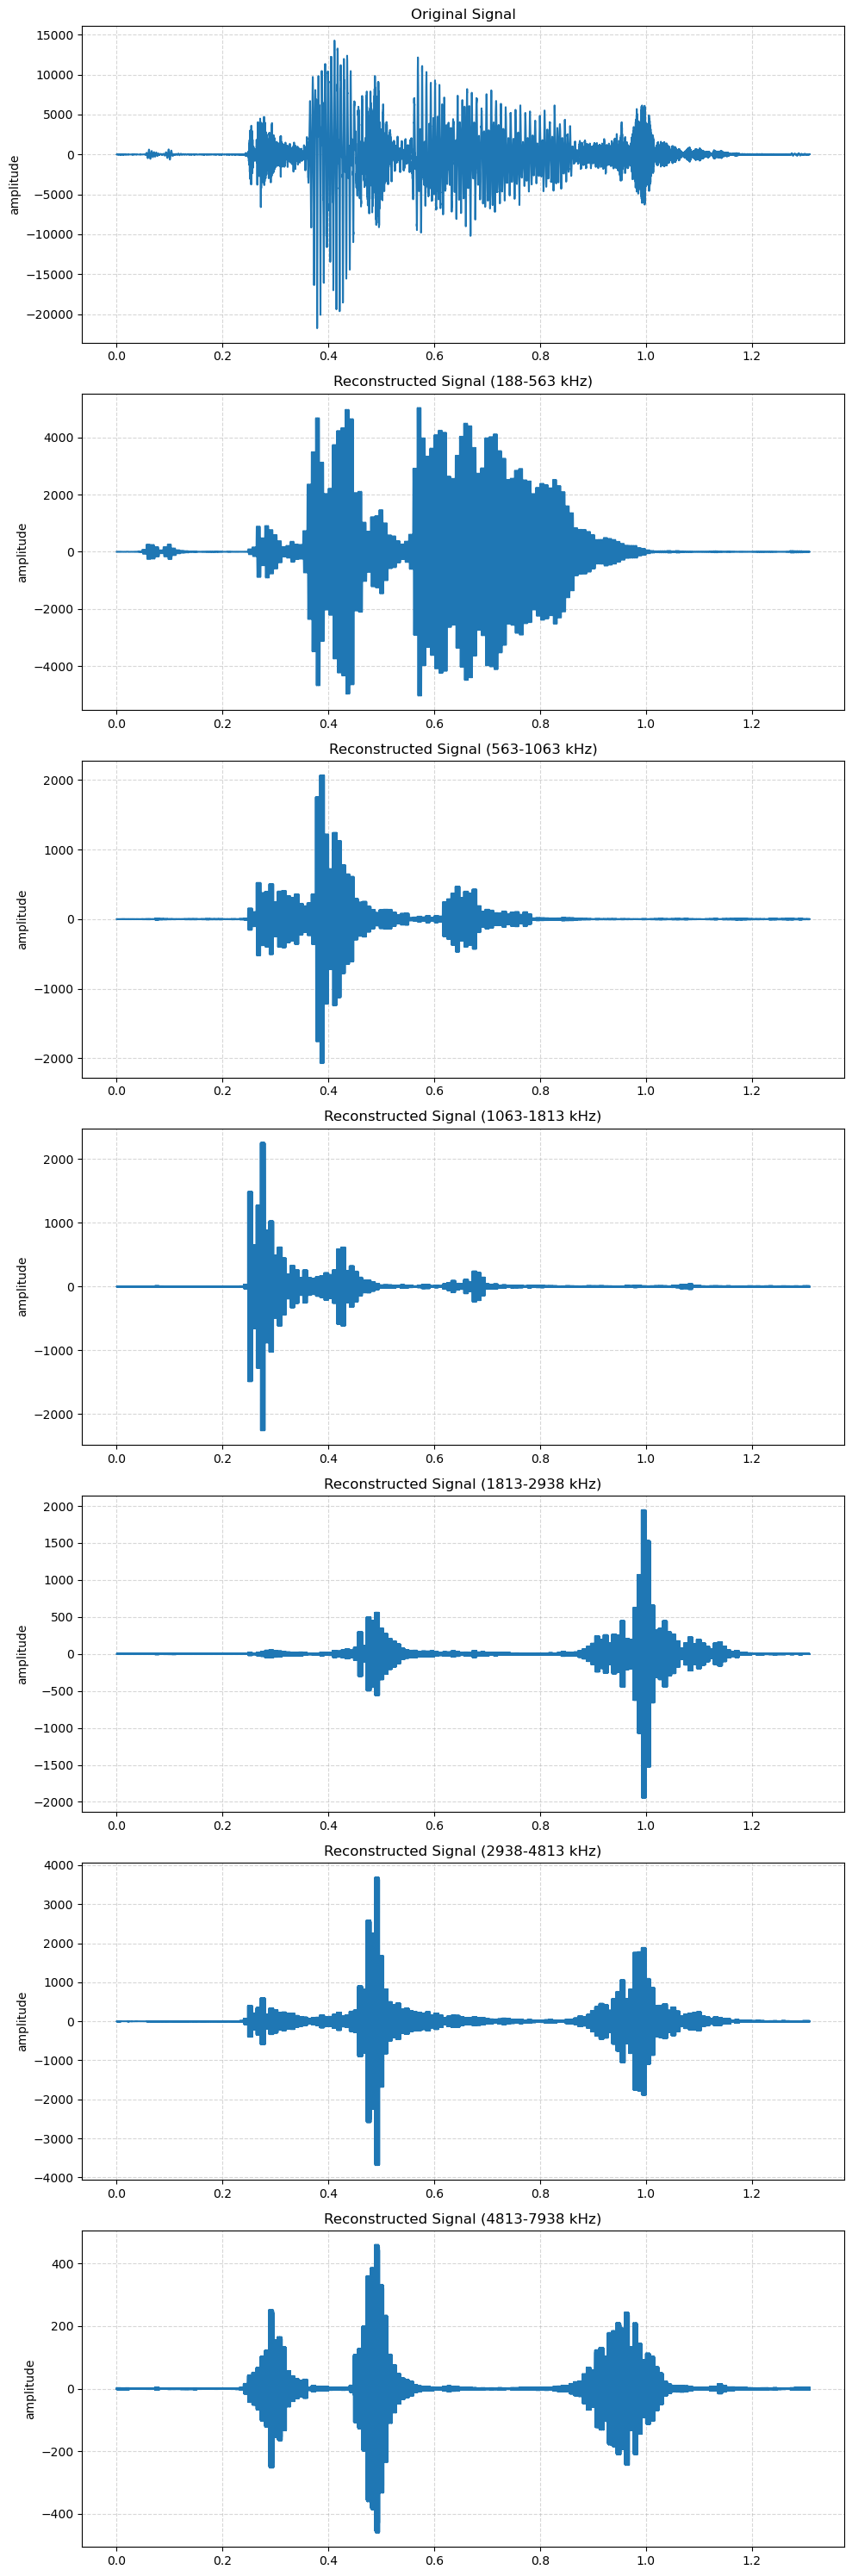

In [29]:
times_reconstructed = np.arange(len(signal[0]))/sample_rate
fig, axes = plt.subplots(len(signal)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Reconstructed Signal ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times_reconstructed, signal[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

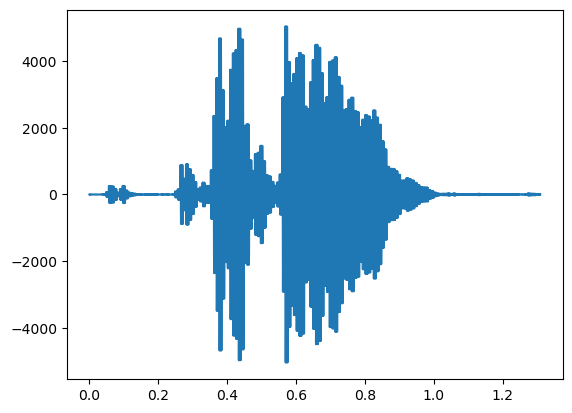

In [22]:
plt.plot(np.arange(len(signal[0]))/sample_rate, signal[0])
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [27]:
signal_wav = sum(np.int16(signal))
print(signal_wav)
scipy.io.wavfile.write("reconstructed_sounds/"+input("Name your audio: ")+"-"+input("How many channels?")+"c.wav"".wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

[  0   1   3 ...  -1  -6 -10]
Name your audio: throway
How many channels?22


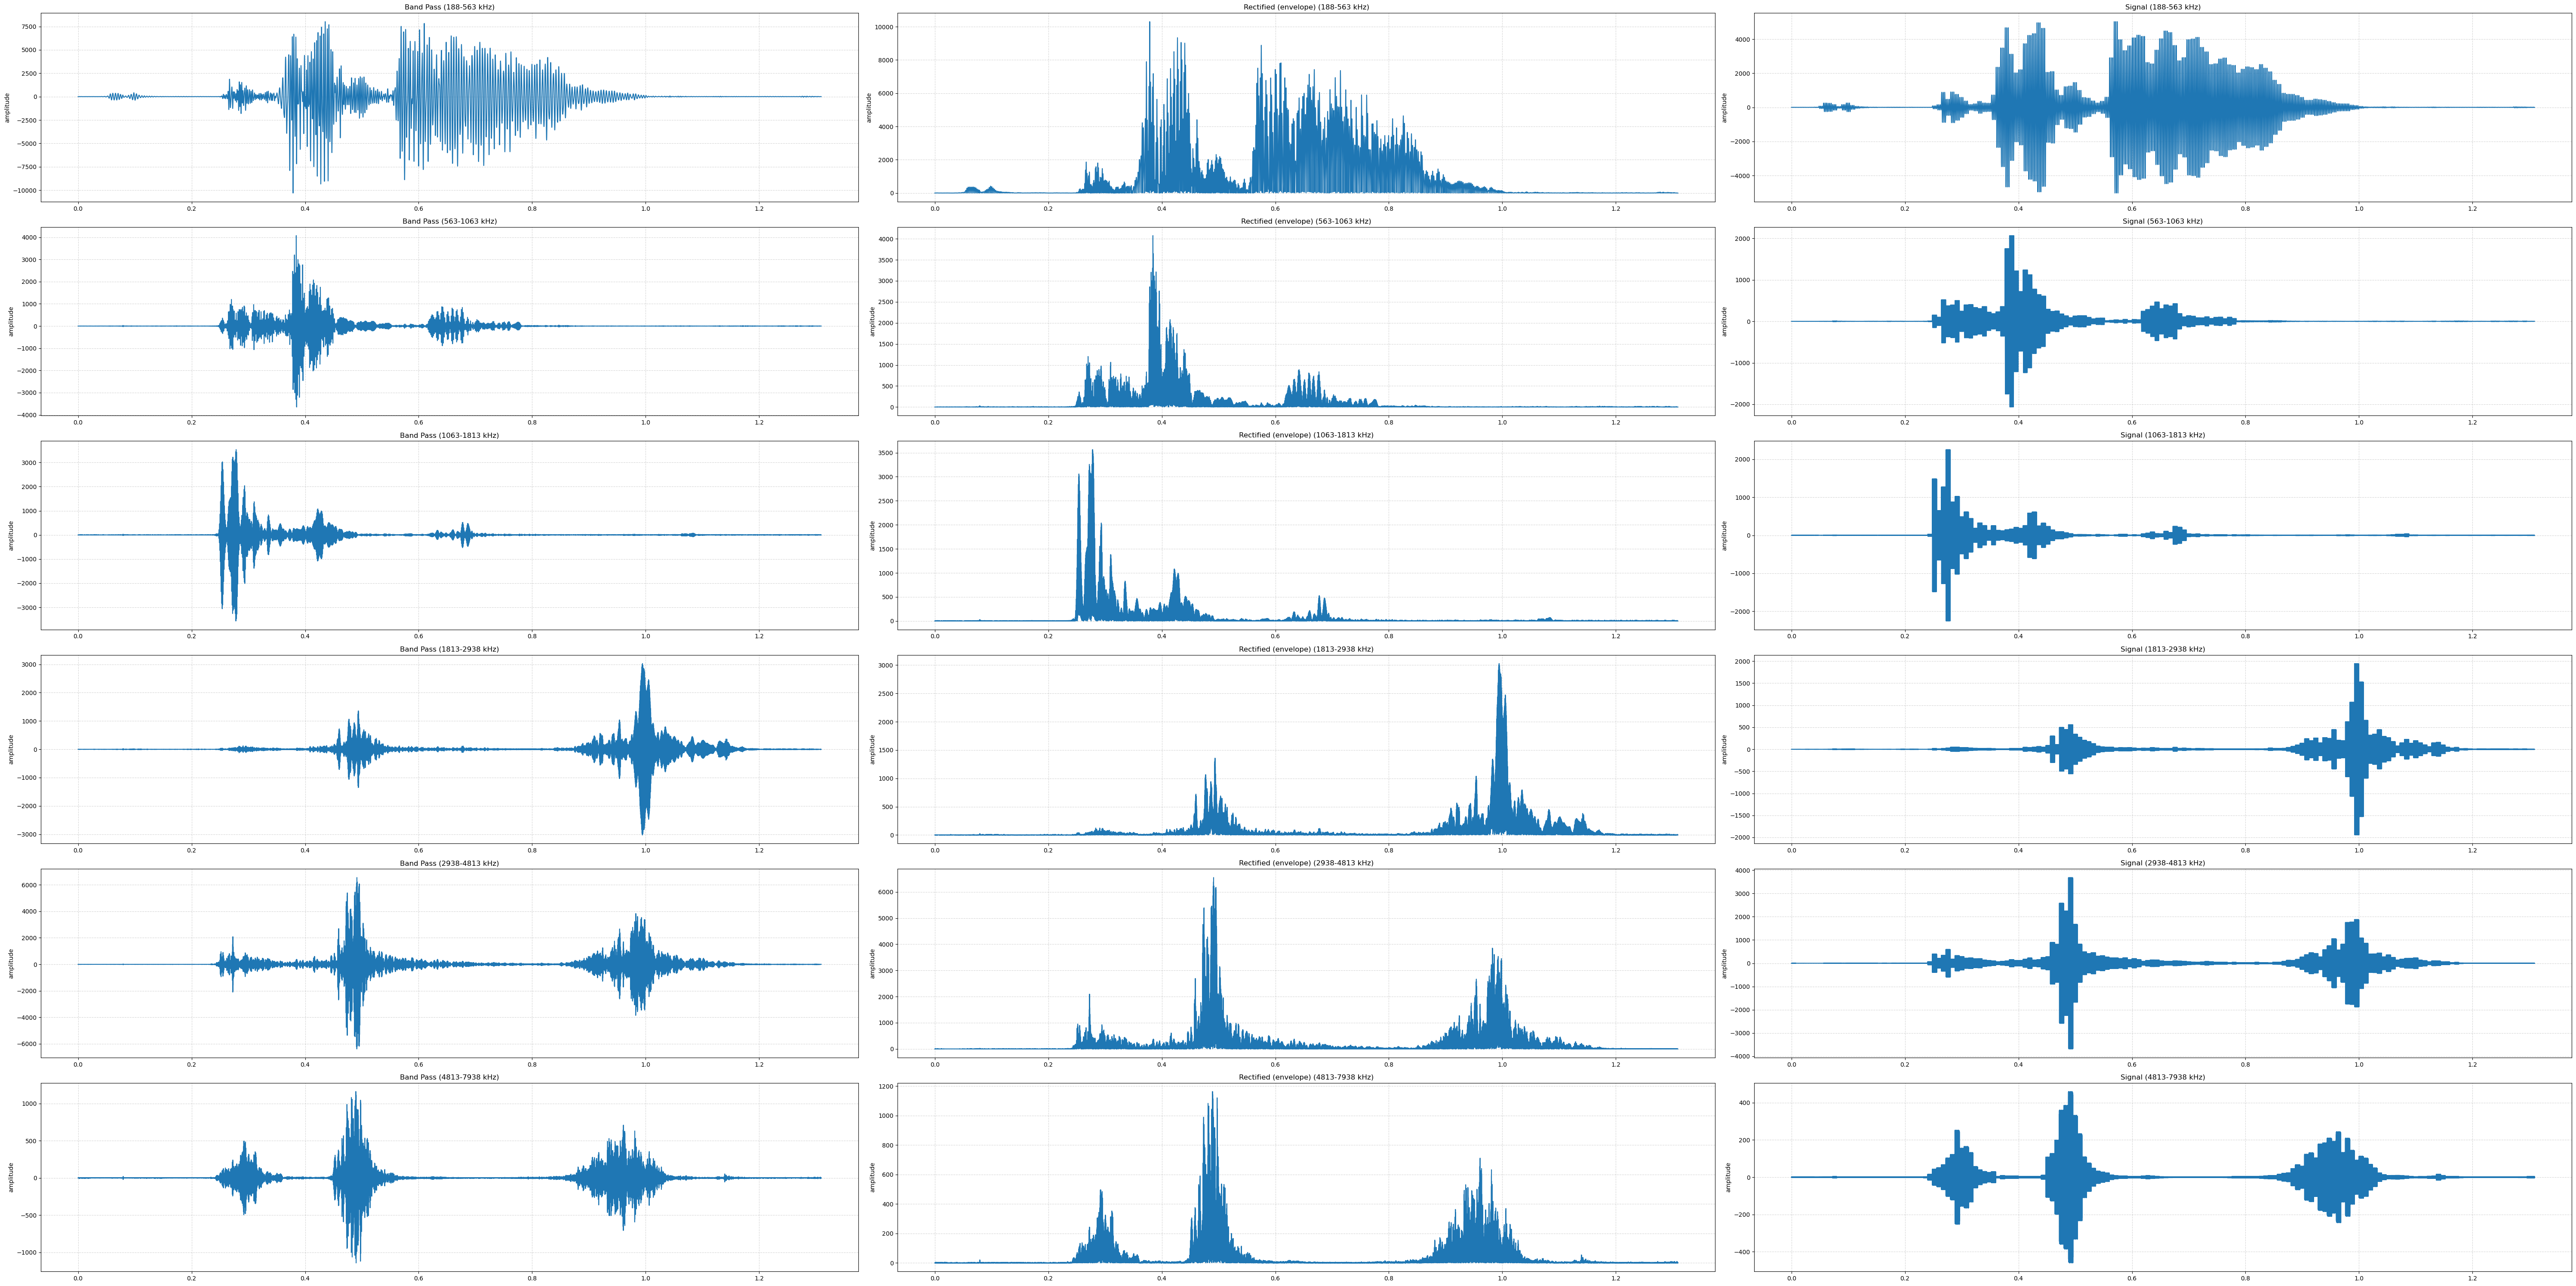

In [47]:
# plot all graphs together
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(len(signal), 3, figsize=(60, 30))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[indx, column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[indx, column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[indx, column_indx].plot(times, columns[column_indx][0][indx])
        axes[indx, column_indx].set_ylabel('amplitude')
#     break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"